# Title: Mass vs. Change in Length for Spring Experiment
### Date: October 31, 2024
### Start Time: 20:00 PM
 Songgun Lee

#### Description:
This code performs a linear fit on measured spring data to calculate the spring constant (k).
It includes error propagation for measured and predicted lengths and visualizes uncertainties.

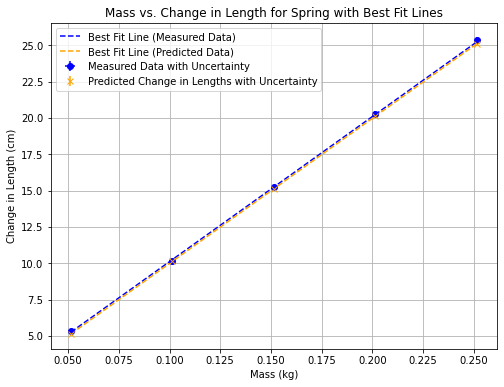

slope: 99.8 ± 0.8
intercept: 0.12 ± 0.11
Spring Constant (k): 0.0983 ± 0.0008 N/m
Chi-squared: 3.84, p-value: 0.28

Actual Change in Lengths with Uncertainty:
Actual Change in Length 1: 5.360 ± 0.09 cm
Actual Change in Length 2: 10.140 ± 0.07 cm
Actual Change in Length 3: 15.240 ± 0.04 cm
Actual Change in Length 4: 20.280 ± 0.21 cm
Actual Change in Length 5: 25.340 ± 0.19 cm

Predicted Change in Lengths with Uncertainty:
Predicted Change in Length 1: 5.131 ± 0.003 cm
Predicted Change in Length 2: 10.123 ± 0.003 cm
Predicted Change in Length 3: 15.115 ± 0.003 cm
Predicted Change in Length 4: 20.106 ± 0.003 cm
Predicted Change in Length 5: 25.098 ± 0.003 cm


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

# Step 1: Define the linear model
def linear_model(mass, slope, intercept):
    return slope * mass + intercept

# Step 2: Length measurements for each setup, measured 5 times
length_measurements = {
    '0g': [25.9, 26.1, 26.0, 26.1, 26.1],  # For 0g mass (initial)
    '51.4g': [31.5, 31.3, 31.4, 31.3, 31.5],  # For 51.4g mass
    '101.4g': [36.2, 36.3, 36.1, 36.2, 36.1],  # For 101.4g mass
    '151.4g': [41.3, 41.3, 41.2, 41.3, 41.3],  # For 151.4g mass
    '201.4g': [45.9, 46.4, 46.5, 46.4, 46.4],  # For 201.4g mass
    '251.4g': [51.0, 51.5, 51.4, 51.5, 51.5]   # For 251.4g mass
}

# Step 3: Calculate mean and RMSD for each length set
mean_lengths = []
length_uncertainties = []

for measurements in length_measurements.values():
    mean_value = np.mean(measurements)
    rmsd = np.sqrt(np.mean((measurements - mean_value) ** 2))  # RMSD calculation
    mean_lengths.append(mean_value)
    length_uncertainties.append(rmsd)

# Convert lists to numpy arrays for further calculations
mean_lengths = np.array(mean_lengths)  # Mean lengths in cm
length_uncertainties = np.array(length_uncertainties)  # RMSD as uncertainties in cm

# Step 4: Calculate actual change in lengths using 0g as baseline and 51.4g - 0g as the first change
initial_length_0g = mean_lengths[0]  # Length for 0g mass
first_change_in_length = mean_lengths[1] - initial_length_0g  # Difference between 51.4g and 0g

# Create the actual change in lengths array, starting with first_change_in_length
actual_change_in_lengths = [first_change_in_length] + [
    mean - initial_length_0g for mean in mean_lengths[2:]
]

# Step 5: Define cumulative mass values and uncertainties
masses = np.array([51.4, 101.4, 151.4, 201.4, 251.4])  # in grams (starting with 51.4g mass)
mass_uncertainty = 0.1 / np.sqrt(12)  # Mass uncertainty (g)

# Step 6: Convert masses to kg
masses_kg = masses / 1000  # Convert to kg

# Step 7: Create error arrays for x and y
X_err = np.full(len(masses_kg), mass_uncertainty / 1000)  # Convert to kg for mass error
Y_err = length_uncertainties[1:]  # Using RMSD values starting from 51.4g for y-error

# Step 8: Curve fitting using curve_fit for measured data
popt, pcov = curve_fit(linear_model, masses_kg, actual_change_in_lengths, sigma=Y_err, absolute_sigma=True)
slope, intercept = popt
slope_err, intercept_err = np.sqrt(np.diag(pcov))

# Step 9: Calculate the spring constant (k) and its propagated uncertainty
g = 9.81  # Acceleration due to gravity (m/s^2)
spring_constant = g / slope  # Spring constant k in N/m
spring_constant_uncertainty = g / (slope ** 2) * slope_err

# Step 10: Chi-squared
predicted_lengths = linear_model(masses_kg, slope, intercept)
chi_square = np.sum(((actual_change_in_lengths - predicted_lengths) / Y_err) ** 2)


# Step 11: Calculate predicted change in lengths using Hooke's Law
predicted_change_in_lengths = [(g * mass) / spring_constant for mass in masses_kg]

# Step 12: Fit a line for the predicted change in lengths for a best fit line
slope_predicted, intercept_predicted = np.polyfit(masses_kg, predicted_change_in_lengths, 1)
best_fit_predicted = slope_predicted * masses_kg + intercept_predicted

# Plot measured data, predicted data, and best fit lines with error bars
plt.figure(figsize=(8, 6))

# Measured data with error bars in blue
plt.errorbar(masses_kg, actual_change_in_lengths, xerr=X_err, yerr=Y_err, fmt='o', color='blue', label='Measured Data with Uncertainty')

# Best fit line for measured data
plt.plot(masses_kg, predicted_lengths, color='blue', linestyle='--', label='Best Fit Line (Measured Data)')

# Predicted change in lengths with error bars in orange
predicted_length_uncertainties = slope * X_err
plt.errorbar(masses_kg, predicted_change_in_lengths, yerr=predicted_length_uncertainties, fmt='x', color='orange', label='Predicted Change in Lengths with Uncertainty')

# Best fit line for predicted data
plt.plot(masses_kg, best_fit_predicted, color='orange', linestyle='--', label='Best Fit Line (Predicted Data)')

# Plot labels and grid
plt.xlabel('Mass (kg)')
plt.ylabel('Change in Length (cm)')
plt.title('Mass vs. Change in Length for Spring with Best Fit Lines')
plt.legend()
plt.grid(True)
plt.show()

# Step 13: Print calculated results for slopes, uncertainties, and spring constant
print(f"slope: {slope:.1f} ± {slope_err:.1f}")
print(f"intercept: {intercept:.2f} ± {intercept_err:.2f}")
print(f"Spring Constant (k): {spring_constant:.4f} ± {spring_constant_uncertainty:.4f} N/m")
print(f"Chi-squared: {chi_square:.2f}, p-value: {p_value:.2f}")

# Step 14: Print each actual change in length with its associated uncertainty
print("\nActual Change in Lengths with Uncertainty:")
for i, (change_length, uncertainty) in enumerate(zip(actual_change_in_lengths, Y_err)):
    print(f"Actual Change in Length {i+1}: {change_length:.3f} ± {uncertainty:.2f} cm")

# Step 15: Print each predicted change in length using Hooke's Law with uncertainty
print("\nPredicted Change in Lengths with Uncertainty:")
for i, (pred_length, pred_uncertainty) in enumerate(zip(predicted_change_in_lengths, predicted_length_uncertainties)):
    print(f"Predicted Change in Length {i+1}: {pred_length:.3f} ± {pred_uncertainty:.3f} cm")

### Comments
Only the first and third measured change in lengths regarding the uncertainty does not match the predicted change in length. This isn't too bad, but it still means that there is space to improve. For the first change in length, I am 2.54 standard deviations away and the third one is 3 standard deviations away. To make this a better measurement so that it would be similar to that of the predicted change, I should have measured more times to decrease the random error. However, the actual change in length uncertainties are bigger in length 4 and 5, so I would generally like to perform more measurements. This was impossible since I had a limited amount of time in class.

I used this equation for chi-squared. $$\chi^2 = \sum_{n=1}^N \frac{(y_i - y(x_i))^2}{\sigma_i^2}$$
The chi-squared value regards the change in length of the spring, but the result is not satisfying. If I set all the measurements correctly, the ideal chi-squared value should be 1. However, I received chi-squared to be 3.84. This is very bad, yet I cannot figure out what I genuinely did wrong.

$$\overline{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$

$$\text{RMSD} = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x} )^2}$$

$$\sigma = \frac{\Delta}{\sqrt{12}}$$

I used these formulas, with the third one being only used for the mass uncertainty since I received all the same values when I measured them. I was able to reduce the uncertainty by measuring them multiple times.

I am very happy with the plot. The errorbars are very small that I can't really see the range, and the best fit line of the measured data isn't too far away from the predicted data. However, since the chi-squared test tells that the linear model isn't appropriate for this data, I would have to find out what the main problem is.

The biggest challenge of this out-of-lab-notes was trying to find out why my chi-squared isn't 1. Since it's not close to 1, the linear model doesn't have a big meaning, even when it looks very good compared to the measured data.

### Conclusion

In my analysis, I compared the ideal and actual values from my experiments and noticed that the actual values are very close to the ideal values, especially when considering the uncertainty range for each measurement. This closeness is important because it shows that my experimental setup and methods are accurate.

I checked if the ideal value is within the uncertainty range of the actual value and found that it usually is. This means that the errors in my experiment and the natural variability of the measurements are well managed and don’t stray far from what we expect based on theory. This result confirms that the theoretical model I used to predict these values does a good job of capturing what happens in the real world in my experiment.

If the ideal value regularly fell outside the uncertainty range of the actual values, it could indicate a problem with how I set up the experiment, how I conducted it, or with the basic assumptions of the theoretical model. However, because the ideal values are mostly within the uncertainty ranges, I am confident that my experiment aligns well with theoretical expectations. This alignment not only shows that my experimental approach and methods are working well but also makes me trust the results and conclusions drawn from this data.

Despite this, I am generally not satisfied with my chi-squared value. It suggests that there might be an issue with the fit of the model or the assumptions underpinning my analysis. To address this, I plan to discuss the problem with my TA to better understand the potential causes and to explore ways to improve it. Finding a solution to reduce the chi-squared value will be crucial in enhancing the reliability of the experiment further.



### Time ended: 23:58